In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [5]:
data=pd.read_csv('/content/drive/MyDrive/# Datasets-20240726T040953Z-001/# Datasets/customer_churn.csv')

In [6]:
df=data.copy()

In [7]:
df_exited = df[df['Exited'] == 0]
rows_to_drop = df_exited.sample(n=3000, random_state=72).index
rows_to_drop

Index([7948,  750, 1154, 4886,  712, 9654, 2401, 3704, 4193, 7121,
       ...
       4237, 2180, 3775, 1433, 2772, 8152, 6687,  466, 2496, 8307],
      dtype='int64', length=3000)

In [8]:
df_modified = df.drop(rows_to_drop)

In [9]:
df=df_modified

##Understanding the data

#####How data looks like?

In [10]:
df.head(8)

,Row Number,Customer Id,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0


#####What is size of data?

In [11]:
df.shape

(7000, 14)

#####What are the column types?

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Row Number       7000 non-null   int64  
 1   Customer Id      7000 non-null   int64  
 2   Surname          7000 non-null   object 
 3   CreditScore      7000 non-null   int64  
 4   Geography        7000 non-null   object 
 5   Gender           7000 non-null   object 
 6   Age              7000 non-null   int64  
 7   Tenure           7000 non-null   int64  
 8   Balance          7000 non-null   float64
 9   NumOfProducts    7000 non-null   int64  
 10  HasCrCard        7000 non-null   int64  
 11  IsActiveMember   7000 non-null   int64  
 12  EstimatedSalary  7000 non-null   float64
 13  Exited           7000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 820.3+ KB


#####How data is mathmatically?

In [13]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row Number,7000.00,5009.03,2889.84,1.00,2498.25,5018.50,7515.25,9999.00
Customer Id,7000.00,15690675.73,72441.05,15565706.00,15627871.75,15689993.50,15753483.75,15815690.00
CreditScore,7000.00,650.57,96.54,350.00,584.00,651.00,718.00,850.00
Age,7000.00,39.51,10.60,18.00,32.00,38.00,45.00,92.00
Tenure,7000.00,5.02,2.88,0.00,3.00,5.00,7.00,10.00
Balance,7000.00,78436.33,62161.81,0.00,0.00,99025.27,128355.09,250898.09
NumOfProducts,7000.00,1.53,0.61,1.00,1.00,1.00,2.00,4.00
HasCrCard,7000.00,0.70,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,7000.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,7000.00,100675.23,57568.86,11.58,51898.78,101168.60,150174.49,199970.74


#####Are there any missing values?

In [14]:
df.isnull().sum()

,0
Row Number,0
Customer Id,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


#####Are there any duplicate rows?

In [15]:
df.duplicated().sum()

0

###How are the categorical features?

In [16]:
df['Surname'].value_counts()

,count
Surname,
Smith,27
Martin,21
Walker,19
Shih,19
Brown,19
...,...
Hirst,1
Mann,1
Enticknap,1


In [17]:
df['Geography'].value_counts()

,count
Geography,
France,3429
Germany,1883
Spain,1688


In [18]:
df['Gender'].value_counts()

,count
Gender,
Male,3742
Female,3258


#####Is data imbalanced?

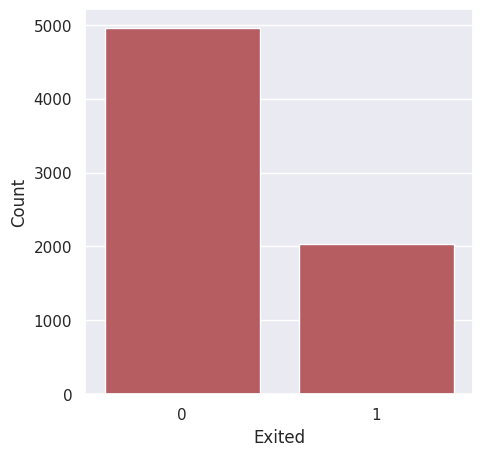

In [19]:
exited=df['Exited'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(x=exited.index,y=exited,color='r')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

##Distribution of the input feautres

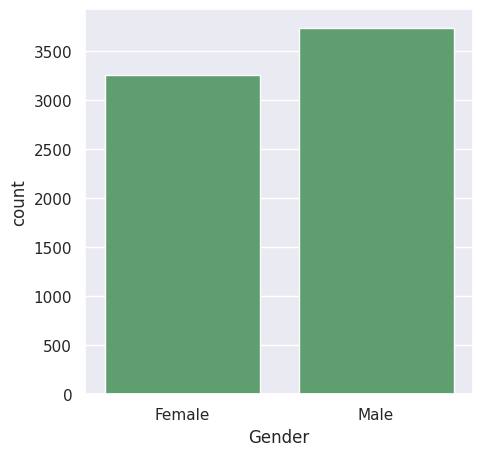

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(x='Gender',data=df,color='g')
plt.show()

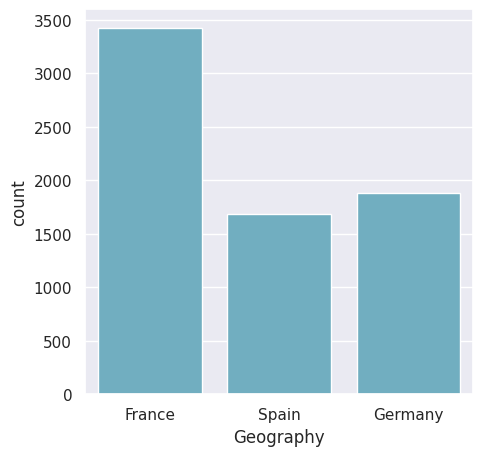

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x='Geography',data=df,color='c')
plt.show()

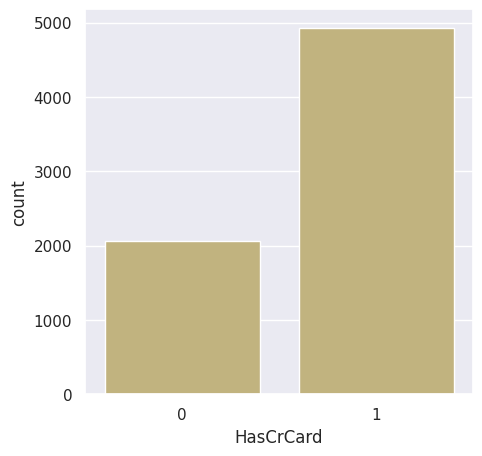

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(x='HasCrCard',data=df,color='y')
plt.show()

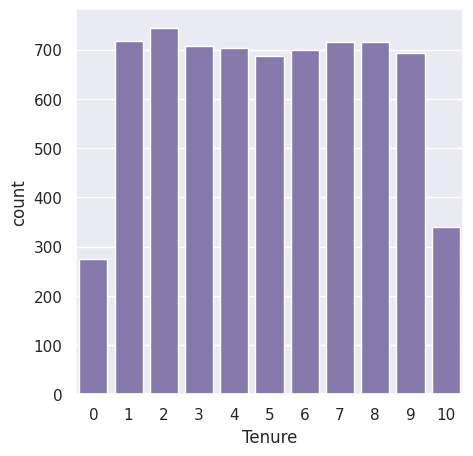

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(x='Tenure',data=df,color='m')
plt.show()

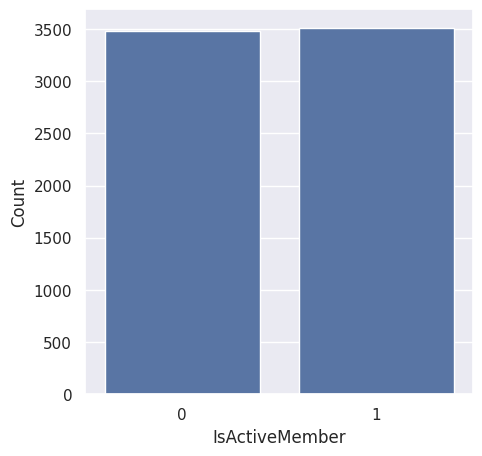

In [24]:
mem=df['IsActiveMember'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(x=mem.index,y=mem)
plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.show()

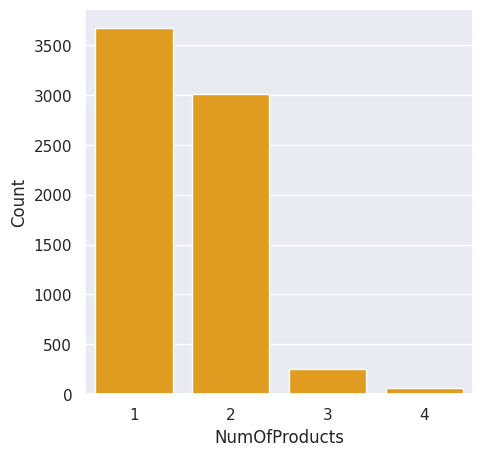

In [25]:
mem=df['NumOfProducts'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(x=mem.index,y=mem,color='#FFA500')
plt.xlabel('NumOfProducts')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

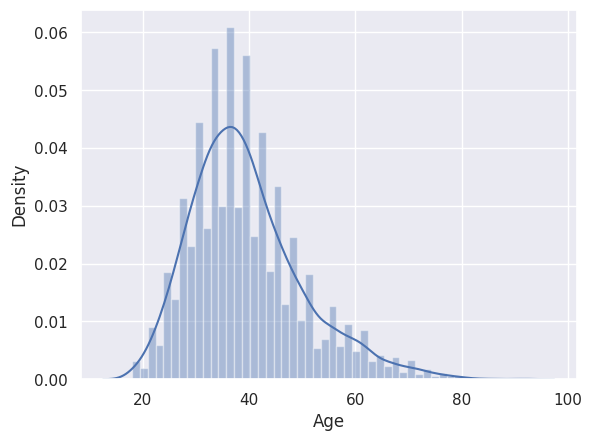

In [26]:
sns.distplot(df['Age'],kde=True)

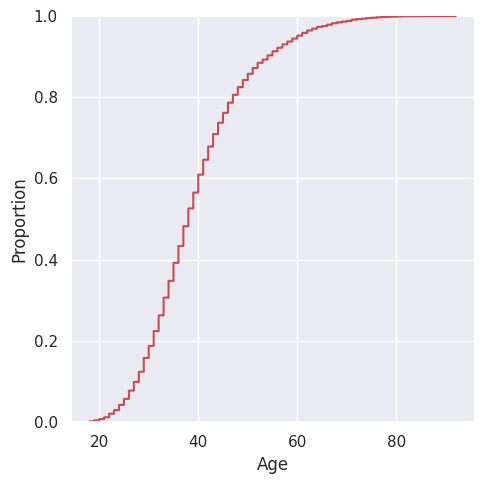

In [27]:
sns.displot(df['Age'],kind='ecdf',color='r')

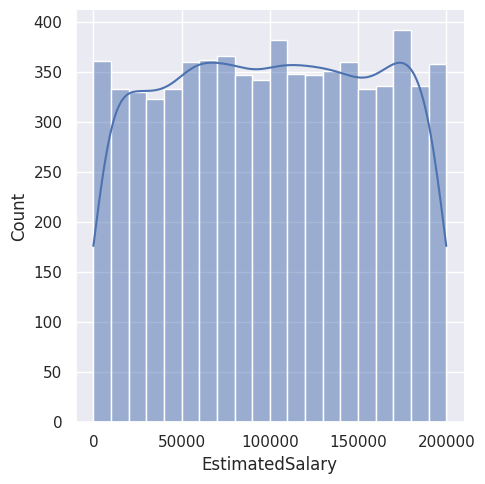

In [28]:
sns.displot(df['EstimatedSalary'],kde=True)

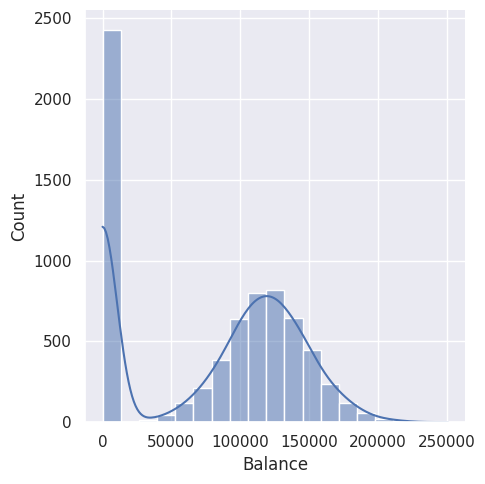

In [29]:
sns.displot(df['Balance'],kde=True)

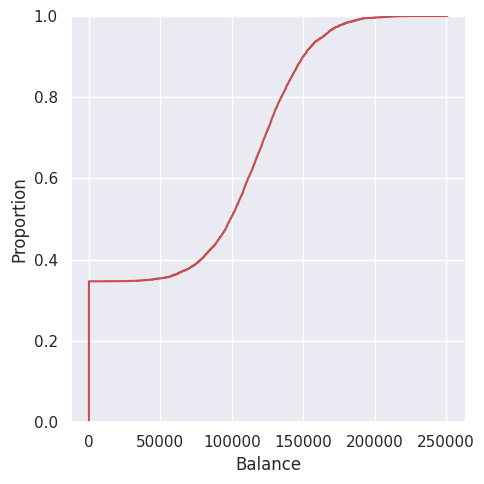

In [30]:
sns.displot(df['Balance'],kind='ecdf',color='r')

##Multivariate analysis


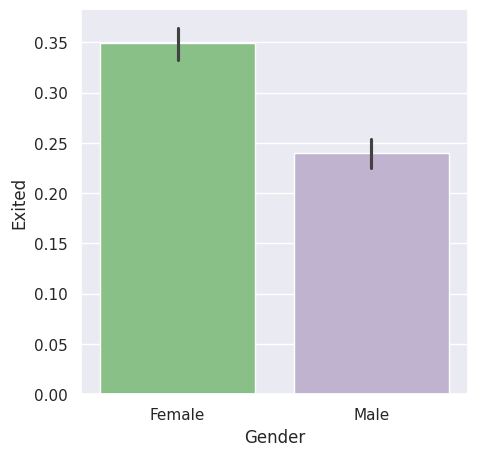

In [31]:
plt.figure(figsize=(5,5))
sns.barplot(y=df['Exited'],x=df['Gender'],palette='Accent')
plt.show()

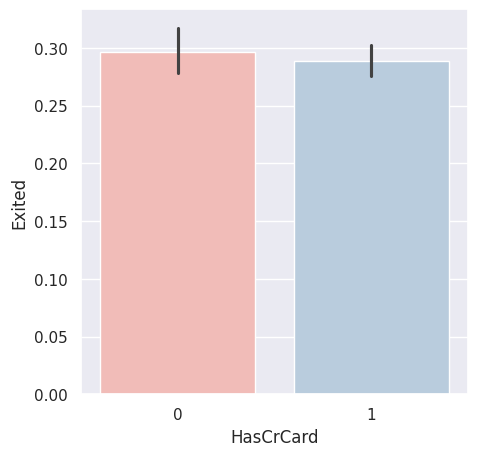

In [32]:
plt.figure(figsize=(5,5))
sns.barplot(y=df['Exited'],x=df['HasCrCard'],palette='Pastel1')
plt.show()

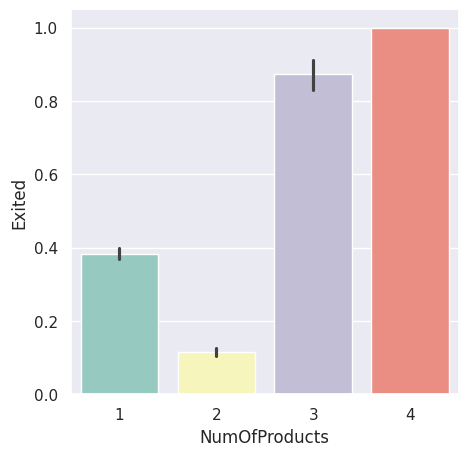

In [33]:
plt.figure(figsize=(5,5))
sns.barplot(y=df['Exited'],x=df['NumOfProducts'],palette='Set3')
plt.show()

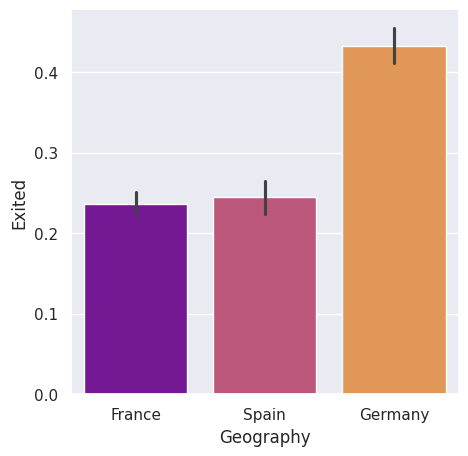

In [34]:
plt.figure(figsize=(5,5))
sns.barplot(y=df['Exited'],x=df['Geography'],palette='plasma')
plt.show()

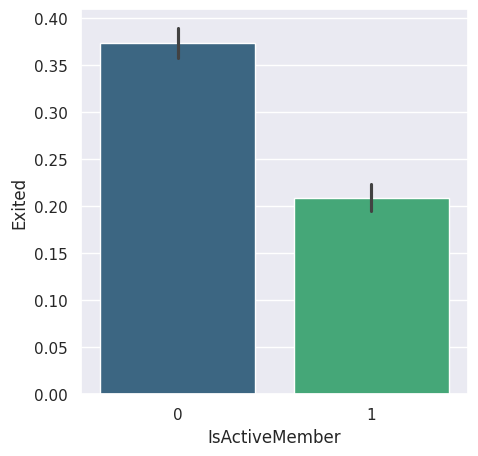

In [35]:
plt.figure(figsize=(5,5))
sns.barplot(y=df['Exited'],x=df['IsActiveMember'],palette='viridis')
plt.show()

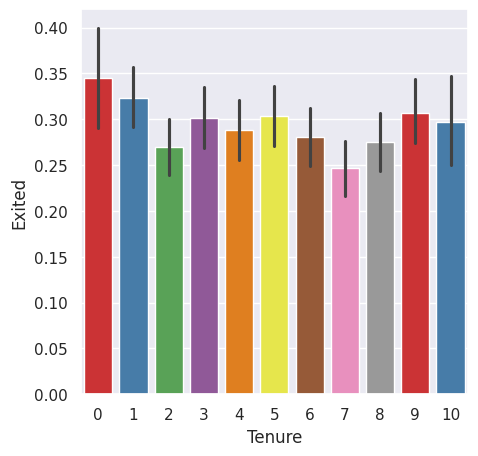

In [36]:
plt.figure(figsize=(5,5))
sns.barplot(y=df['Exited'],x=df['Tenure'],palette='Set1')
plt.show()

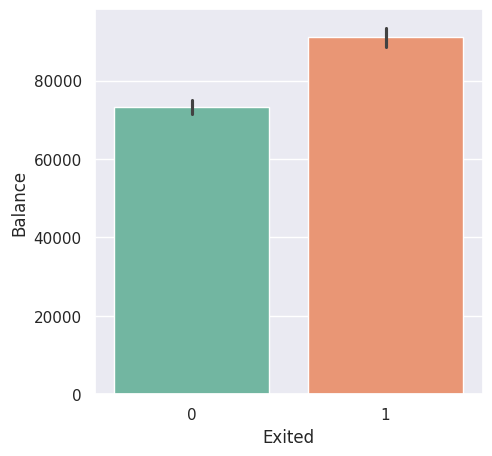

In [37]:
plt.figure(figsize=(5,5))
sns.barplot(x=df['Exited'],y=df['Balance'],palette='Set2')
plt.show()

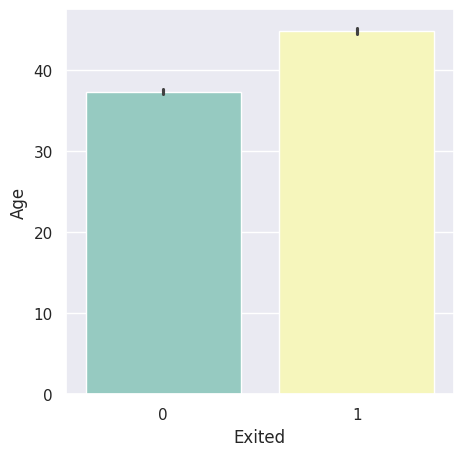

In [38]:
plt.figure(figsize=(5,5))
sns.barplot(x=df['Exited'],y=df['Age'],palette='Set3')
plt.show()

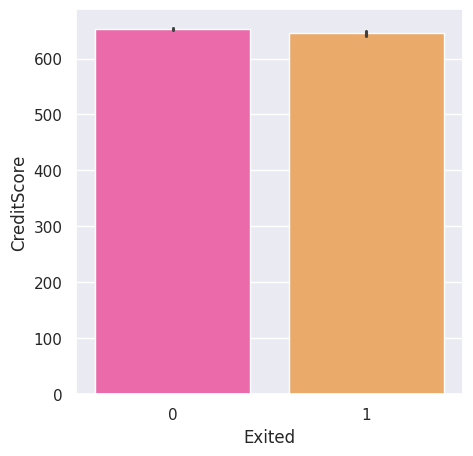

In [39]:
plt.figure(figsize=(5,5))
sns.barplot(x=df['Exited'],y=df['CreditScore'],palette='spring')
plt.show()

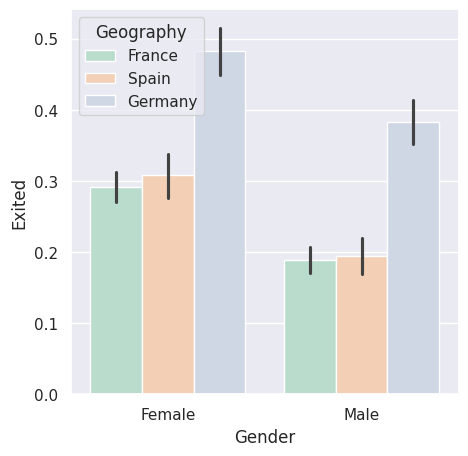

In [40]:
plt.figure(figsize=(5,5))
sns.barplot(y=df['Exited'],x=df['Gender'],hue=df['Geography'],palette='Pastel2')
plt.show()

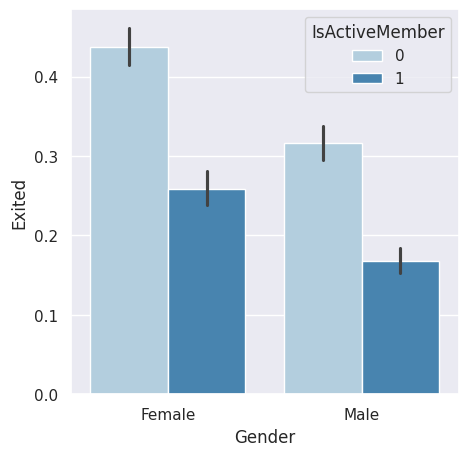

In [41]:
plt.figure(figsize=(5,5))
sns.barplot(y=df['Exited'],x=df['Gender'],hue=df['IsActiveMember'],palette='Blues')
plt.show()

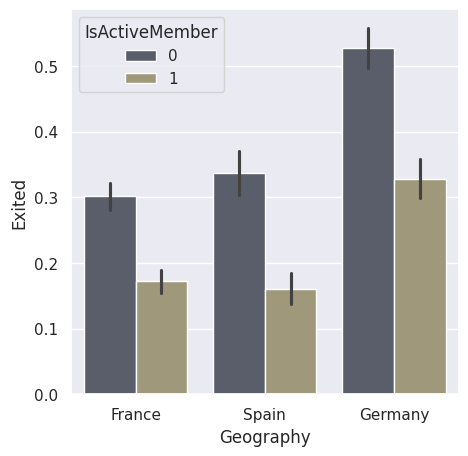

In [42]:
plt.figure(figsize=(5,5))
sns.barplot(y=df['Exited'],x=df['Geography'],hue=df['IsActiveMember'],palette='cividis')
plt.show()

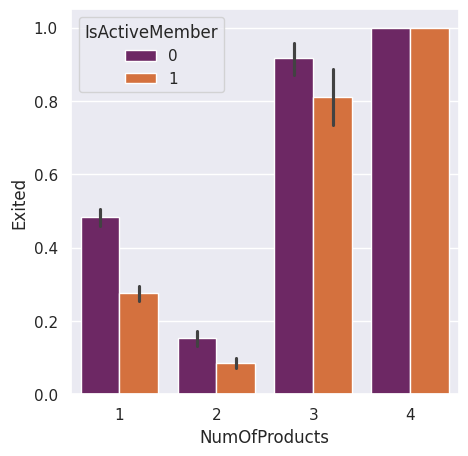

In [43]:
plt.figure(figsize=(5,5))
sns.barplot(y=df['Exited'],x=df['NumOfProducts'],hue=df['IsActiveMember'],palette='inferno')
plt.show()

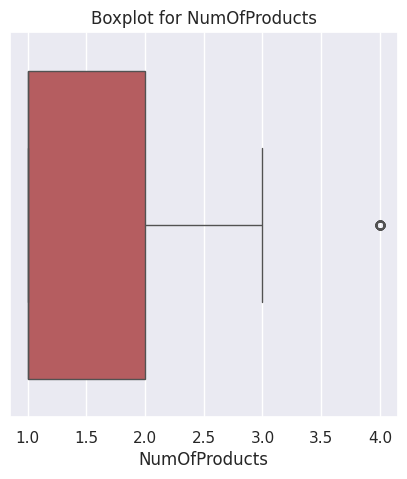

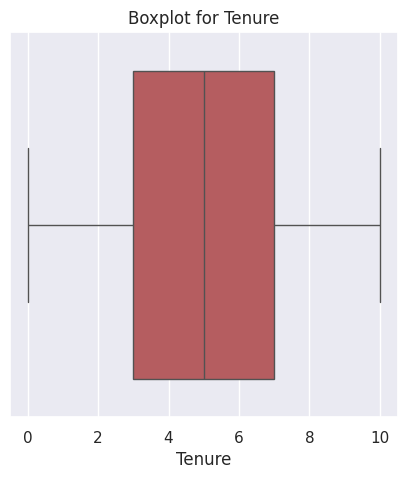

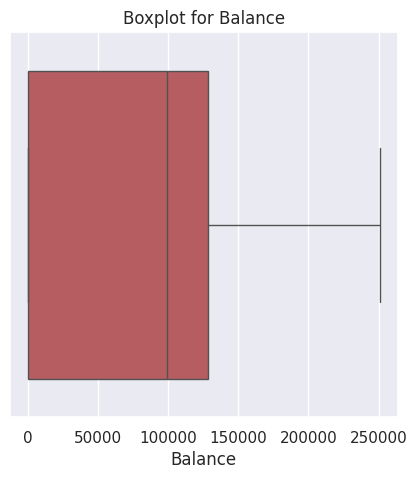

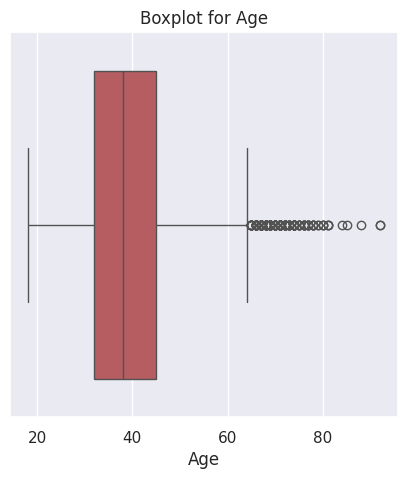

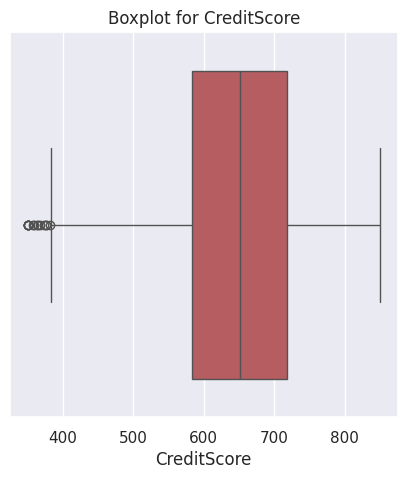

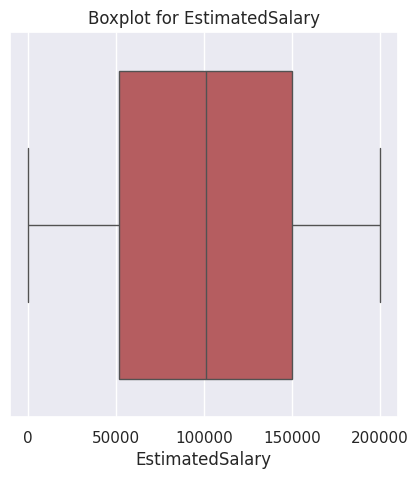

In [44]:
cols=['NumOfProducts','Tenure','Balance','Age','CreditScore','EstimatedSalary']
def plot_boxplots(df):
    for column in cols:
        plt.figure(figsize=(5, 5))  # Set the figure size
        sns.boxplot(x=df[column], color='r')  # Plot the boxplot for the column
        plt.title(f'Boxplot for {column}')  # Set title for each plot
        plt.show()  # Show the plot

plot_boxplots(df)

##Data Preprocessing

In [45]:
#There are 2932 unique surnames so it will be very difficult to use it as a feature.So we will remove this feature.
df.drop('Surname',axis=1,inplace=True)

In [46]:
df.drop('Row Number',axis=1,inplace=True)
df.drop('Customer Id',axis=1,inplace=True)

In [47]:
df_cleaned = df[df['Age'] <= 60]


In [48]:
# correlation_matrix = df.corr()

# # Create a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Heatmap')
# plt.show()

# Distance based algorithms

In [49]:
X=df_cleaned.drop('Exited',axis=1)
y=df_cleaned['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [50]:
def fit_transform_ohe_X_train(X_train, columns_to_encode, desired_order):
    # Initialize OneHotEncoder
    ohe = OneHotEncoder(drop='first', sparse_output=False)

    # Fit and transform the specified categorical columns
    encoded_columns_train = ohe.fit_transform(X_train[columns_to_encode])

    # Get new column names after encoding
    encoded_column_names = ohe.get_feature_names_out(columns_to_encode)

    # Create a DataFrame with the encoded columns
    encoded_X_train = pd.DataFrame(encoded_columns_train, columns=encoded_column_names)

    # Drop original categorical columns from X_train
    X_train = X_train.drop(columns_to_encode, axis=1)

    # Concatenate the original DataFrame with the encoded DataFrame
    X_train_encoded = pd.concat([X_train.reset_index(drop=True), encoded_X_train.reset_index(drop=True)], axis=1)

    # Reorder the columns according to the desired order
    X_train_encoded = X_train_encoded[desired_order]

    return X_train_encoded, ohe

In [51]:
columns_to_encode = ['Geography', 'Gender']
desired_order = ['CreditScore', 'Geography_Germany', 'Geography_Spain', 'Gender_Male', 'Age', 'Tenure',
                 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Fit and transform the training data, reorder columns
X_train, ohe = fit_transform_ohe_X_train(X_train, columns_to_encode, desired_order)


In [52]:
def transform_ohe_X_test(X_test, encoder, columns_to_encode, desired_order):
    encoded_columns_test = encoder.transform(X_test[columns_to_encode])

    # Get new column names after encoding
    encoded_column_names = encoder.get_feature_names_out(columns_to_encode)

    # Create a DataFrame with the encoded columns
    encoded_X_test = pd.DataFrame(encoded_columns_test, columns=encoded_column_names)

    # Drop original categorical columns from X_test
    X_test = X_test.drop(columns_to_encode, axis=1)

    # Concatenate the original DataFrame with the encoded DataFrame
    X_test_encoded = pd.concat([X_test.reset_index(drop=True), encoded_X_test.reset_index(drop=True)], axis=1)

    # Reorder the columns according to the desired order
    X_test_encoded = X_test_encoded[desired_order]

    return X_test_encoded

# Transform the test data using the fitted encoder and reorder columns
X_test = transform_ohe_X_test(X_test, ohe, columns_to_encode, desired_order)


In [53]:
features_to_scale = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age']

# Initialize a single StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = X_train.copy()  # Copy original DataFrame to keep the structure intact
X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])

# Transform the test data using the same scaler (without fitting again)
X_test_scaled = X_test.copy()  # Copy original DataFrame to keep the structure intact
X_test_scaled[features_to_scale] = scaler.transform(X_test[features_to_scale])

###Logistic Regression

In [54]:
lr=LogisticRegression()

param_grid_lr={'C':[0.001,0.01,0.1,1,10,100,1000],
              'penalty':['l1','l2'],
              'solver':['liblinear']}
grid_lr=GridSearchCV(estimator=lr,param_grid=param_grid_lr,cv=5,scoring='accuracy',verbose=2)
grid_lr.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solv

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy', verbose=2)

In [55]:
grid_lr.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

###SVC

In [56]:
svc=SVC()

param_grid_svc = {'C': [0.1,0.5, 1,10],
                  'kernel': ['linear', 'rbf'],
                  'gamma': ['scale', 'auto']}
grid_svc=GridSearchCV(estimator=svc,param_grid=param_grid_svc,cv=5,scoring='accuracy',verbose=1)
grid_svc.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [57]:
grid_svc.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

###Naive bayes

In [58]:
nb=GaussianNB()
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # variance smoothing hyperparameter
}

# Initialize GridSearchCV
grid_nb = GridSearchCV(estimator=nb, param_grid=param_grid_nb, cv=5, scoring='accuracy')

# Fit the model
grid_nb.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='accuracy')

In [59]:
grid_nb.best_params_

{'var_smoothing': 1e-09}

###KNN

In [60]:
knn=KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics
    'p': [1, 2]  # Power parameter for the Minkowski metric (only applies to 'minkowski' metric)
}

# Initialize GridSearchCV
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')

# Fit the model
grid_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [61]:
grid_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

# Tree-based algorithmns

###Decision Tree

In [64]:
dt=DecisionTreeClassifier()

In [65]:
param_grid_dt = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}


In [66]:
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5,scoring='accuracy',verbose=1)
grid_dt.fit(X_train, y_train)
grid_search_dt = grid_dt.best_estimator_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [67]:
grid_dt.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 18}

###Random Forest

In [68]:
rf=RandomForestClassifier()

In [69]:
param_grid_rf = {'min_samples_split': [5,10,15],
                 'n_estimators': [100,200,300],
                 'max_depth': [10,20,25],
                 'max_features': [3,6,9]}


grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5,scoring='accuracy',verbose=2)
grid_rf.fit(X_train, y_train)
grid_search_rf = grid_rf.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, max_features=3, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=3, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=3, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=3, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=3, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=3, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, max_features=3, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END max_depth=10, max_features=3, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, max_features=3, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, max_features=3, min_samples_split=5, n_est

In [70]:
grid_rf.best_params_

{'max_depth': 20,
 'max_features': 3,
 'min_samples_split': 15,
 'n_estimators': 200}

###XGBoost

In [71]:
xgb_clf = xgb.XGBClassifier()

# Define the hyperparameters for tuning
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.2],
    'subsample': [0.5, 0.7, 1],
    'n_estimators': [80,100],
    'colsample_bytree': [0.3, 0.6, 1.0],
    'gamma': [0.5, 1,2],
}
# Initialize GridSearchCV
grid_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1,verbose=2)

# Fit the model
grid_xgb.fit(X_train, y_train)

# Get the best model with optimal hyperparameters
best_xgb = grid_xgb.best_estimator_

# Display the best parameters
print(f"Best Parameters: {grid_xgb.best_params_}")

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'colsample_bytree': 0.3, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 80, 'subsample': 1}


#Results

In [72]:
#Null accuracy
y.value_counts().head(1)/len(y)

,count
Exited,
0,0.71


In [73]:
def evaluate_models_with_auc(models, X_train, y_train, X_test, y_test):
    # Initialize a list to store the results
    results = []

    # Iterate over the models
    for model_name, model in models.items():
        # Predictions on the training set
        train_preds = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_preds)

        # Predictions on the test set
        test_preds = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_preds)
        test_recall = recall_score(y_test, test_preds)  # Recall score for binary classification

        # Confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, test_preds).ravel()

        # Calculate AUC
        if hasattr(model, "predict_proba"):  # Check if the model supports predict_proba
            y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
        else:
            y_pred_prob = model.decision_function(X_test)  # For models like SVC
            y_pred_prob = (y_pred_prob - y_pred_prob.min()) / (y_pred_prob.max() - y_pred_prob.min())  # Normalize to [0,1]

        auc_value = roc_auc_score(y_test, y_pred_prob)
        f1 = f1_score(y_test, test_preds)

        # Append results to the list
        results.append({
            'Model': model_name,
            'Training Accuracy': train_accuracy,
            'Testing Accuracy': test_accuracy,
            'Recall': test_recall,
            'False Negatives': fn,
            'AUC': auc_value,
            'F1 Score': f1
        })

    # Convert results list to DataFrame
    results_df = pd.DataFrame(results)
    return results_df

In [74]:
rf_model = RandomForestClassifier(
    max_depth=15,
  max_features= 5,
  min_samples_split= 10,
  n_estimators= 100)

# Fit the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, max_features=5, min_samples_split=10)

In [75]:
param_grid_rf_2 = {'min_samples_split': [8,10,12],
                 'n_estimators': [150,210,250],
                 'max_depth': [5,10,15],
                 'max_features': [2,4,6,8]}


grid_rf_2 = GridSearchCV(estimator=rf, param_grid=param_grid_rf_2, cv=5,scoring='accuracy',verbose=2)
grid_rf_2.fit(X_train, y_train)
grid_search_rf_2 = grid_rf_2.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=5, max_features=2, min_samples_split=8, n_estimators=150; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=8, n_estimators=150; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=8, n_estimators=150; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=8, n_estimators=150; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=8, n_estimators=150; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=8, n_estimators=210; total time=   0.7s
[CV] END max_depth=5, max_features=2, min_samples_split=8, n_estimators=210; total time=   0.7s
[CV] END max_depth=5, max_features=2, min_samples_split=8, n_estimators=210; total time=   0.7s
[CV] END max_depth=5, max_features=2, min_samples_split=8, n_estimators=210; total time=   0.7s
[CV] END max_depth=5, max_features=2, min_samples_split=8, n_estimators=2

In [76]:
# Assuming best models are stored as best_knn, best_rf, best_gnb, etc.
models = {
    'Decision Tree': grid_dt,
    'Random Forest': grid_rf,
    'Forest 2': rf_model,
    'Forest 3': grid_rf_2,
    'XGBoost': best_xgb,
}
models_dis={
    'Logistic Regression': grid_lr,
    'SVC': grid_svc,
    'Naive Bayes': grid_nb,
    'KNN': grid_knn,

}

# Call the function with your data
results_df1 = evaluate_models_with_auc(models, X_train, y_train, X_test, y_test)
results_df_dis1 = evaluate_models_with_auc(models_dis, X_train_scaled, y_train, X_test_scaled, y_test)

merged_df1 = pd.concat([results_df1, results_df_dis1], ignore_index=True)

merged_df1

,Model,Training Accuracy,Testing Accuracy,Recall,False Negatives,AUC,F1 Score
0,Decision Tree,0.84,0.82,0.60,153,0.85,0.66
1,Random Forest,0.90,0.83,0.56,168,0.87,0.66
2,Forest 2,0.93,0.83,0.58,160,0.87,0.67
3,Forest 3,0.90,0.83,0.55,175,0.87,0.65
4,XGBoost,0.84,0.82,0.56,168,0.88,0.65
5,Logistic Regression,0.78,0.78,0.44,215,0.81,0.54
6,SVC,0.87,0.82,0.53,181,0.84,0.63
7,Naive Bayes,0.79,0.80,0.53,180,0.82,0.61
8,KNN,1.00,0.80,0.44,215,0.83,0.56


In [77]:
grid_rf_2.best_params_

{'max_depth': 15,
 'max_features': 2,
 'min_samples_split': 12,
 'n_estimators': 210}

In [79]:
joblib.dump(grid_dt, 'dt.pkl')


['dt.pkl']